# **Project on Prediction of Fashion MNIST dataset**


Dhairya Ajitkumar Patel - 20906076



In [ ]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Input
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam 
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import keras.utils
from keras import utils as np_utils
from keras.models import Model
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten, Input
from tensorflow.keras.utils import to_categorical, plot_model
from IPython.display import Image 
import warnings
warnings.filterwarnings("ignore")


In [ ]:
uploaded = files.upload()

Saving x_test.csv to x_test.csv
Saving x_train.csv to x_train.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


In [ ]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

np.random.seed(5)

In [ ]:
print("x_train shape is: ",x_train.shape)
print("y_train shape is: ",y_train.shape)
print("x_test shape is: ",x_test.shape)
print("y_test shape is: ",y_test.shape)


x_train shape is:  (60000, 784)
y_train shape is:  (60000, 1)
x_test shape is:  (10000, 784)
y_test shape is:  (10000, 1)


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "x_test.csv" with length 22179097 bytes
User uploaded file "x_train.csv" with length 132891899 bytes
User uploaded file "y_test.csv" with length 20002 bytes
User uploaded file "y_train.csv" with length 120002 bytes


In [ ]:
#Load dataset from CSV file
x_train = pd.read_csv(io.StringIO(uploaded['x_train.csv'].decode('utf-8')))
x_test = pd.read_csv(io.StringIO(uploaded['x_test.csv'].decode('utf-8')))
y_train = pd.read_csv(io.StringIO(uploaded['y_train.csv'].decode('utf-8')))
y_test = pd.read_csv(io.StringIO(uploaded['y_test.csv'].decode('utf-8')))

In [ ]:
#One hot encode the target label
y_train = to_categorical(y_train,5)
y_test = to_categorical(y_test,5)
y_train.shape

(60000, 5)

In [ ]:
#Reshape X as (examples, height, width, channels)
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))

#Normalization and convert to float
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

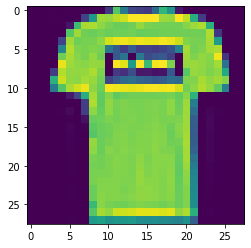

In [ ]:
#Display a random image from the training data
imgtest = x_train[1].reshape((28,28))
plt.imshow(imgtest)
plt.show()


In [ ]:
print("x_train shape after reshaping is: ",x_train.shape)
print("y_train shape after reshaping is: ",y_train.shape)
print("x_test shape after reshaping is: ",x_test.shape)
print("y_test shape after reshaping is: ",y_test.shape)

x_train shape after reshaping is:  (60000, 28, 28, 1)
y_train shape after reshaping is:  (60000, 5)
x_test shape after reshaping is:  (10000, 28, 28, 1)
y_test shape after reshaping is:  (10000, 5)


#**[CM1]** CNN with default network:


*   *Two CNN layers with Kernel size of (3,3) and 32 filters, stride of 1 with padding size of (1,1) and max-pooling between these two CNN layer with pool size of (2,2) and at the end one fully that map the last CNN layer to 5 outputs.*
*   *ReLU activation functions.*
*   *Softmax output layer for the classification decision.*






In [ ]:
model = tf.keras.models.Sequential()
model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters we will learn 
        kernel_size=(3, 3), # Size of feature map that will slide over image
        strides=(1, 1), # How the feature map "steps" across the image
        padding='same', # We are not using padding
        activation='relu', # Rectified Linear Unit Activation Function
        input_shape=(28, 28, 1) # The expected input shape for this layer
    )
) 
# The next layer we will add is a Maxpooling layer. This will reduce the 
# dimensionality of each feature, which reduces the number of parameters that 
# the model needs to learn, which shortens training time.
model.add(
    tf.keras.layers.MaxPooling2D(
        pool_size=(2, 2), # Size feature will be mapped to
        padding = "SAME"
    )
)

model.add(
    tf.keras.layers.Conv2D(
        filters=32, # How many filters we will learn 
        kernel_size=(3, 3), # Size of feature map that will slide over image
        strides=(1, 1), # How the feature map "steps" across the image
        padding='same', # We are not using padding
        activation='relu', # Rectified Linear Unit Activation Function
    )
)

model.add(
    tf.keras.layers.Flatten()
)
model.add(
    tf.keras.layers.Dense(
        units=5, # Output shape
        activation='softmax' # Softmax Activation Function
    )
)

##### Image of Default network architecture:

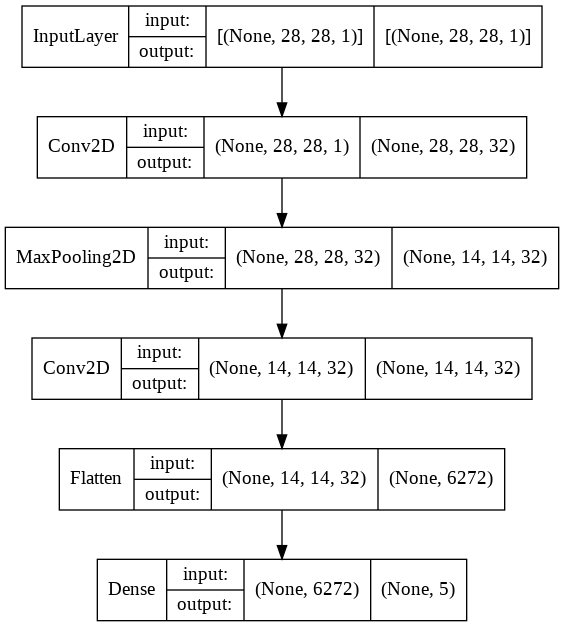

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

In [ ]:
#training default model:
import time
#Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
start_time = time.time()
#Train the model
data=model.fit(x_train, y_train, batch_size=10, validation_split=0.2,epochs=10)
end_time =time.time()
print("Total training time for is {:0.2f} minutes".format ((end_time - start_time)/60.0))
#Use the trained model to predict output of X test data
start1 = time.time()
pred_X = model.predict(x_test)
pred_X
end1 =time.time()
print("Total testing time for is {:0.2f} minutes".format ((end1 - start1)/60.0))
#Evaluate the model
print("Loss and testing accuracy is as follows: ")
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/10
4800/4800 [==============================] - 27s 3ms/step - loss: 0.3226 - accuracy: 0.8823 - val_loss: 0.2333 - val_accuracy: 0.9187
Epoch 2/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.2106 - accuracy: 0.9252 - val_loss: 0.2149 - val_accuracy: 0.9222
Epoch 3/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.1772 - accuracy: 0.9371 - val_loss: 0.1980 - val_accuracy: 0.9292
Epoch 4/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1548 - accuracy: 0.9449 - val_loss: 0.1885 - val_accuracy: 0.9357
Epoch 5/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1393 - accuracy: 0.9505 - val_loss: 0.1933 - val_accuracy: 0.9324
Epoch 6/10
4800/4800 [==============================] - 15s 3ms/step - loss: 0.1249 - accuracy: 0.9553 - val_loss: 0.2024 - val_accuracy: 0.9314
Epoch 7/10
4800/4800 [==============================] - 16s 3ms/step - loss: 0.1135 - accuracy: 0.9596 - val_loss: 0.1883 - val_ac

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 5)                 31365     
                                                                 
Total params: 40,933
Trainable params: 40,933
Non-trainable params: 0
____________________________________________________

#**[CM2] Your own network:**


*As seen from above model that our model takes around 4 mins to train and it slightly overfits the data. So, we are now going to design and implement a much simpler network with less convolution layer.
Our model is defined as below:*

*   *One CNN layer with kernel size (3,3) followed by a Maxpool layer of size (2,2), followed by two dense Fully Connected layers and a softmax layer at the end for classification*
*   *ReLU activation functions*
*   *Adam Optimizer, loss is 'categorical_crossentropy'*

*We are trying best values for optimizing our model, we are changing the values of number of filters, epochs and the number of nodes in the dense layers. We will finally compare the accuracies of both the models and pick our best parameters from it.*

*For designing our own network we are taking a model as described above. Now to choose the parameters that give best results we are changing the values of number of filters in conv layer and the number of nodes in the dense layer. So, we are creating a model A and model B with the parameters as described:*
*  *Model A: no_of_filters = 32, nodes in dense layer = 32, epochs = 5*
*  *Model B: no_of_filters = 64, nodes in dense layer  =100, epochs = 10* 

*For the model we are keeping the batch_size as 32*

* ***For simplicity of the assignment the part in CM3 where it asks to try different parameters in the model, we are trying this part in this CM2 itself so that the reader has a better overview of the results***

In [ ]:
def our_model(no_of_filters,filter_size,pooling_size,nodes,epoch1):
  #Design our own sequential model for CNN
  model_custom = Sequential()
  #Add Convolution layer 
  model_custom.add(Conv2D(no_of_filters, filter_size, activation='relu', input_shape=(28, 28, 1)))
  #Add Max Pooling Layer
  model_custom.add(MaxPooling2D(pooling_size))
  #Flatten to 1D
  model_custom.add(Flatten())
  #Add one hidden layer
  model_custom.add(Dense(nodes, activation='relu'))
  #Add another hidden layer
  model_custom.add(Dense(nodes, activation='relu'))
  
  #softmax layer
  model_custom.add(Dense(5, activation='softmax'))
  # compiling the sequential model
  model_custom.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  starttime = time.time()
  # training the model for 10 epochs
  outs = model_custom.fit(x_train, y_train, epochs=epoch1, validation_split=0.2)
  endtime =time.time()
  print("Total training time for is {:0.2f} minutes".format ((endtime - starttime)/60.0))
  start2 = time.time()
  predX = model_custom.predict(x_test)
  predX
  end2 =time.time()
  print("Total testing time for is {:0.2f} minutes".format ((end2 - start2)/60.0))
  print("loss and accuracy on training data is: ")
  Loss, accuracy = model_custom.evaluate(x_test, y_test)
  tf.keras.utils.plot_model(model_custom, to_file='model1.png', show_shapes=True, show_layer_names=False)
  a = Image(filename='model1.png')
  return outs, a, model_custom


#  ***Model A:***


In [ ]:
outs1,a,model_custom1 = our_model(32,(3,3),(2,2),32,5)


Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3677 - accuracy: 0.8629 - val_loss: 0.2696 - val_accuracy: 0.9019
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2363 - accuracy: 0.9157 - val_loss: 0.2221 - val_accuracy: 0.9210
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1952 - accuracy: 0.9305 - val_loss: 0.2026 - val_accuracy: 0.9286
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1715 - accuracy: 0.9387 - val_loss: 0.2036 - val_accuracy: 0.9311
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1527 - accuracy: 0.9457 - val_loss: 0.1985 - val_accuracy: 0.9309
Total training time for is 0.47 minutes
Total testing time for is 0.01 minutes
loss and accuracy on training data is: 
313/313 [==============================] - 1s 3ms/step - loss: 0.2068 - accuracy: 0.9268


Architecture of model A: 


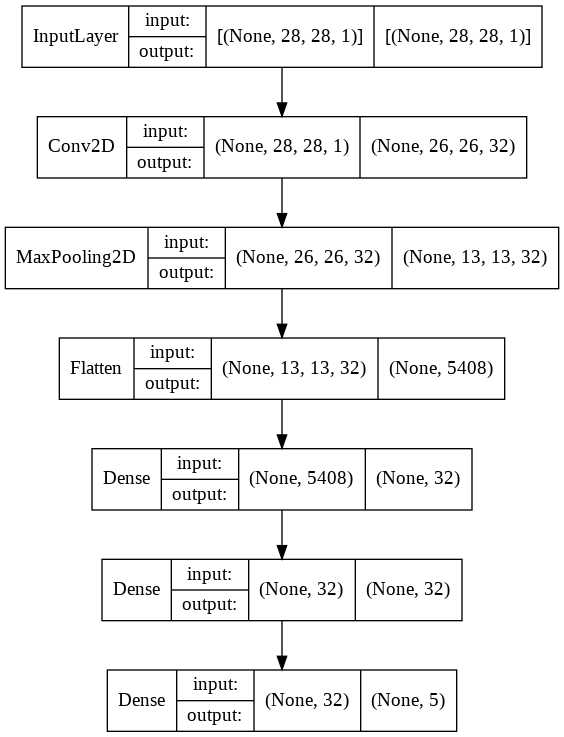

In [ ]:
print("Architecture of model A: ")
a

In [ ]:
print("Model A summary is described as:")
model_custom1.summary()

Model A summary is described as:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                173088    
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                     

#  ***Model B:***

In [ ]:
outs2,b ,model_custom2= our_model(64,(3,3),(2,2),100,10)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3156 - accuracy: 0.8847 - val_loss: 0.2227 - val_accuracy: 0.9208
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1950 - accuracy: 0.9310 - val_loss: 0.2058 - val_accuracy: 0.9263
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1598 - accuracy: 0.9423 - val_loss: 0.1914 - val_accuracy: 0.9327
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1323 - accuracy: 0.9525 - val_loss: 0.1752 - val_accuracy: 0.9392
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1109 - accuracy: 0.9602 - val_loss: 0.1975 - val_accuracy: 0.9364
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0943 - accuracy: 0.9653 - val_loss: 0.2021 - val_accuracy: 0.9392
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0787 - accuracy: 0.9710 - val_loss: 0.2339 - val_accuracy:

Architecture of model B is 


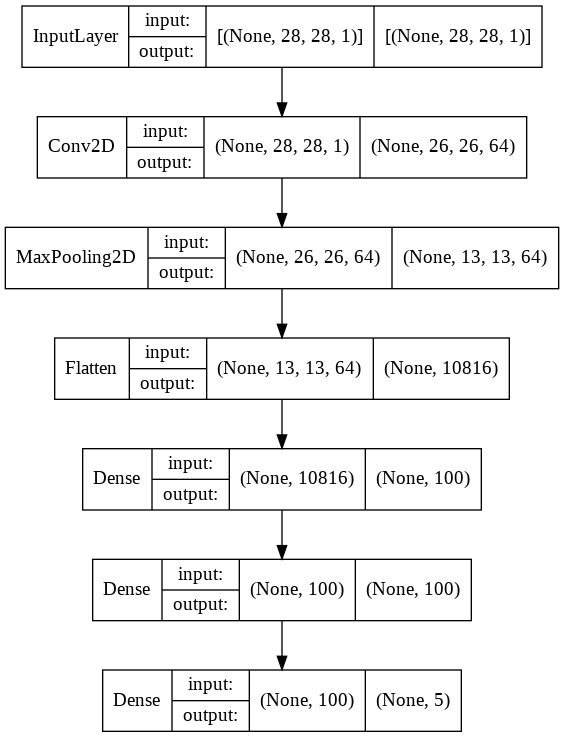

In [ ]:
print("Architecture of model B is ")
b

In [ ]:
print("Model A summary is described as:")
model_custom2.summary()

Model A summary is described as:
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 10816)             0         
                                                                 
 dense_4 (Dense)             (None, 100)               1081700   
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 5)                 505       
                     

# **[CM3] Briefly report on the following:**

> • Runtime performance for training and testing.


> • Comparison of the different parameters or designs you tried. (already shown above)

> • You can use any plots to explain the performance of your approach. But at the very least produce two plots, one of training loss vs. training epoch and one of classification accuracy vs. training epoch on both your training and test set.

In [ ]:
def graph_plot(model1,text1,epochs1):
  model1 = model1
  if (text1 =="Training"):
    acc = [ round(elem, 3) for elem in model1.history['accuracy'] ]
    loss1 = [ round(elem, 3) for elem in model1.history['loss'] ]
  elif (text1 =="Validation"):
    acc = [ round(elem, 3) for elem in model1.history['val_accuracy'] ]
    loss1 = [ round(elem, 3) for elem in model1.history['val_loss'] ]

  # plt.figure(figsize=(8,10))
  fig, ax = plt.subplots(figsize=(10, 5))
  epochs1 = epochs1
  plt.plot(epochs1,acc ,color = 'red', marker='.',label = str(text1)+" Accuracy",markerfacecolor='red', markersize=8)
  plt.plot(epochs1,loss1 ,color = 'green', marker='.',label = "Loss",markerfacecolor='green', markersize=8)
  ax.scatter(epochs1,acc)
  for i, txt in enumerate(acc):
    if (text1 =="Training"):
      ax.annotate(txt, (epochs1[i], model1.history['accuracy'][i]))
    elif (text1 =="Validation"):
      ax.annotate(txt, (epochs1[i], model1.history['val_accuracy'][i]))
    
  for i, txt in enumerate(loss1):
    if (text1 =="Training"):
      ax.annotate(txt, (epochs1[i], model1.history['loss'][i]))
    elif (text1 =="Validation"):
      ax.annotate(txt, (epochs1[i], model1.history['val_loss'][i]))
  plt.title(str(text1)+ " accuracy and "+ str(text1)+" loss vs epoch")
  plt.xlabel('Epochs')
  plt.ylabel(str(text1) + " accuracy and  loss for "+ str(text1)+" data")
  plt.legend()
  plt.show()

### ***Training, Validation plots for accuracy and loss vs epoch | Default model:***

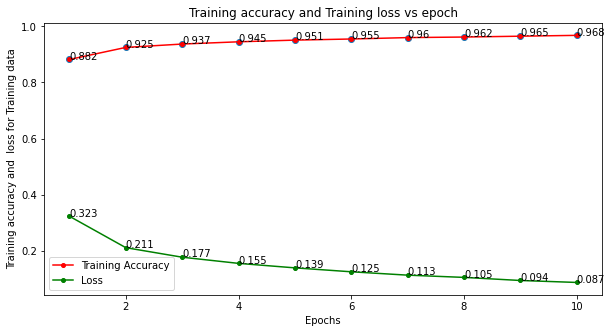

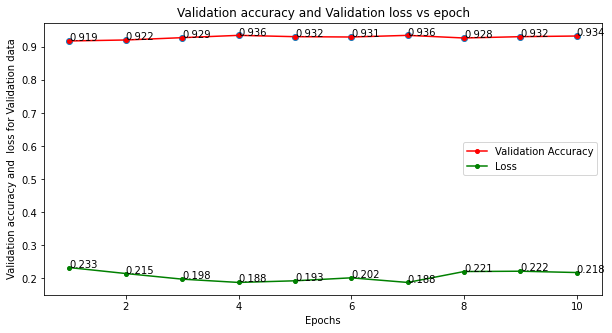

In [ ]:
graph_plot(data,"Training",[1,2,3,4,5,6,7,8,9,10])
graph_plot(data,"Validation",[1,2,3,4,5,6,7,8,9,10])

### ***Training, Validation plots for accuracy and loss vs epoch | Model A:***

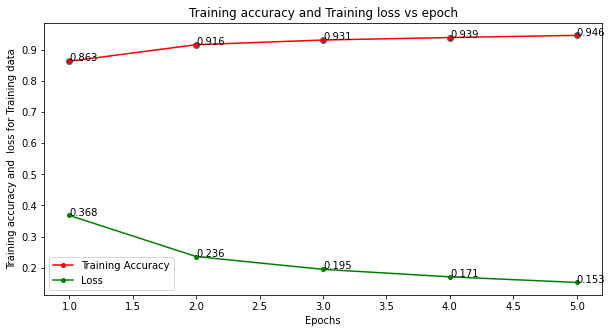

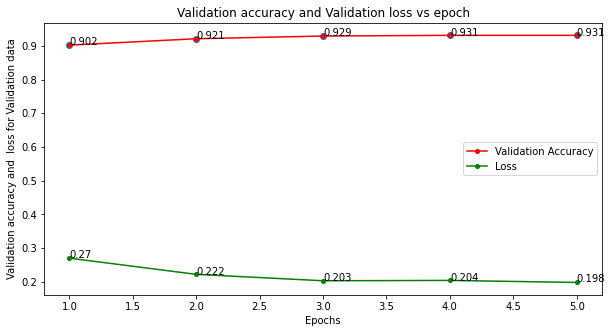

In [ ]:
graph_plot(outs1,"Training",[1,2,3,4,5])
graph_plot(outs1,"Validation",[1,2,3,4,5])

### ***Training, Validation plots for accuracy and loss vs epoch | Model B:***

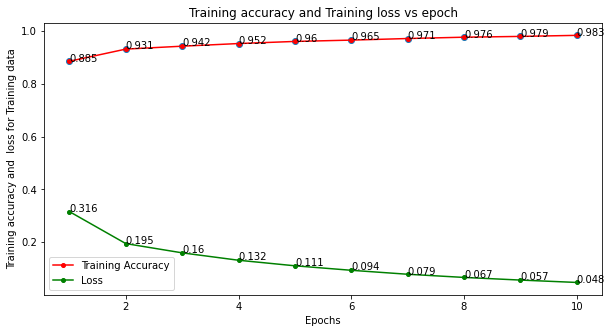

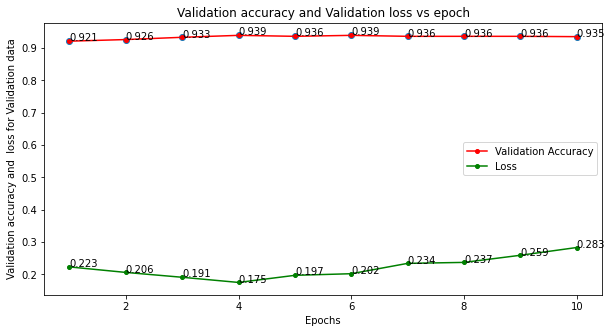

In [ ]:
graph_plot(outs2,"Training",[1,2,3,4,5,6,7,8,9,10])
graph_plot(outs2,"Validation",[1,2,3,4,5,6,7,8,9,10])

# ***Comparing Models***
| Model | # filters | Units in dense layer | batch_size| Epoch| Train_acc.| Validation acc.| Train_time | Test_acc.| loss | # params|
| :- | -: |-: |-: |-: |-: |-: |-: |-: |-: | :-: |
| Default | 32 | N/A |10| 10| 0.968 |0.933| 3.39min | 0.931| 0.238 |~41k|
| Model A | 32 | 32 |32| 5| 0.944 |0.931| 0.47min | 0.927| 0.206 |~175k|
| Model B | 64 | 100 |32| 10| 0.983 |0.934| 0.96min | 0.932| 0.311 |~1.1M|

*So Finally, we can see from the above results that the best model in terms of training accuracy is model B but seeing its testing accuracy we can say that it slightly overfits the data. In contrast with Default model it seems to be performing well but due to the batch_size of 10 and 2 conv layers it takes a lot of time to train the model. The lowest time taken is Model A, also the accuracy of training and testing is almost similar, which says that Model A does not overfit. From the graphs we can see that validation loss is more as compared to the training loss for default model shows that it is not performing better resulting into overfitting of data.Model B has increasing validation loss which shows its overfitting the data with 10 epochs, while model A seems to be perfect as the validation  loss is just at a point where it starts to increase after a certain point, so here the epoch is 5 rather than 10 to prevent overfitting. The number of parameters to be trained for Default, Model A and Model B are around 41k, 175k, 1.1m respectively. So for later assignment tasks we will model A as its our best model after carrying out the above analysis*

# **[CM4] Carry out the following activities:**

# ***PCA on the encoded layer:***

In [ ]:
import keras.backend as K
from keras import backend as K
extractor = keras.Model(inputs=model_custom1.inputs,
                        outputs=[model_custom1.layers[4].output])
features = extractor(x_test)
features.shape

TensorShape([10000, 32])

In [ ]:
p=features.numpy() 
px = pd.DataFrame(p) #creating dataframe of encoded layer as px

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit_transform(px)
principalDf = pd.DataFrame(data = X_r, columns = ['principal component 1', 'principal component 2'])

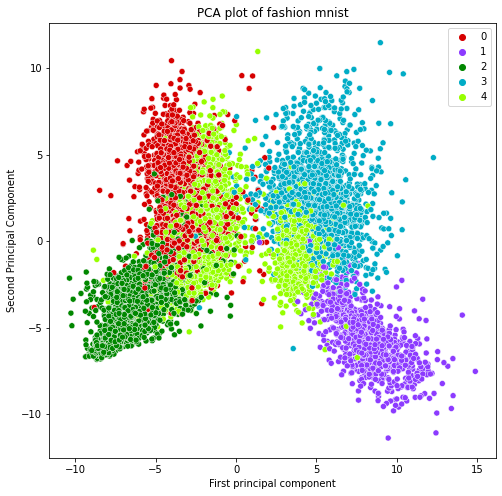

In [ ]:
import colorcet as cc
a = y_test
y_test1=[np.where(r==1)[0][0] for r in a]
#plotting pca plot to see the separation among datapoints of different classes
plt.figure(figsize=(8,8))
# plt.scatter(finalDf['principal component 1'],finalDf['principal component 2'],c=abalone_r['Rings'],cmap='Set1')
fig=sns.scatterplot(x="principal component 1", y="principal component 2", hue=y_test1,palette=sns.color_palette(cc.glasbey, n_colors=5),
                data=principalDf)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title("PCA plot of fashion mnist")
plt.show()

*Looking at the above graph of PCA plot we can see that for label 4 we are able to get two cluster which have some small distance between then which shows there must be clothes which have some diferent characteristic say for example one light green cluster might be a hoodie and the next might be a cluster other than hoodie. Similarly the left light green cluster points are grouped near red (label 0) and the dark green cluster points (label 2).  We can interpret this as there might be clothes which might have same features in all the three labels like a skirt in one label and a dress or a gown in another. We can interpret more whats in the label, more clearly after seeing the clear images of the training/testing data which we will be doing below after the t-sne plot.*


# ***K-means clustering on encoded layer:***

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(px)
y_kmeans=kmeans.labels_
y_kmeans

array([1, 2, 2, ..., 4, 2, 4], dtype=int32)

In [ ]:
kmeans = KMeans(5)
kmeans.fit(px)
identified_clusters = kmeans.predict(px)

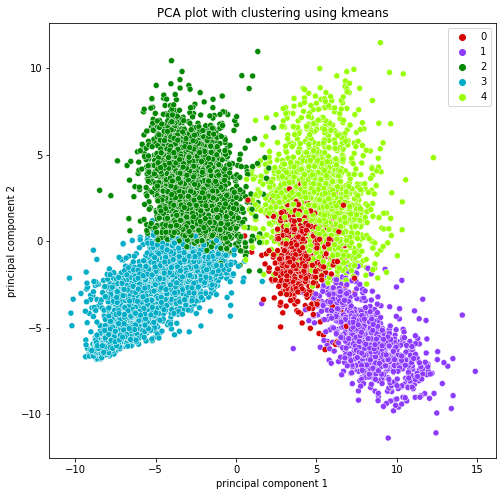

In [ ]:
plt.figure(figsize=(8,8))
fig=sns.scatterplot(x="principal component 1", y="principal component 2", hue=identified_clusters,palette=sns.color_palette(cc.glasbey, n_colors=5),
                data=principalDf)
plt.title("PCA plot with clustering using kmeans")
plt.show()

The above PCA plot with clusters derived from Kmeans when compared with the original PCA plot shows that we now have more clearer differentiation of labels among the data points. Here all the labels except label 0 have a clear differentiation among themselves.  From this we can interpret that label 0 might have some apparel which have same features/type of clothes with clusters label 4 and label 1. Comparing both the plots we can say that kmeans makes the clusters better as compared to the original PCA plot.

# ***DBSCAN on encoded layer:***

In [ ]:
from sklearn.cluster import DBSCAN
def dbscan(px, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(px)
    y_pred = db.fit_predict(px)
    print("Clusters are:",set(y_pred))
    print("count of noise: ", np.count_nonzero(y_pred == -1))
    plt.figure(figsize=(8,8))
    # plt.scatter(x="principal component 1", y="principal component 2",c=y_pred, cmap='Set2',data=principalDf)
    fig=sns.scatterplot(x="principal component 1", y="principal component 2", hue=y_pred,palette=sns.color_palette(cc.glasbey, n_colors=len(set(y_pred))),
                data=principalDf)
    plt.title("DBSCAN clustering")


Clusters are: {0, 1, 2, 3, -1}
count of noise:  490


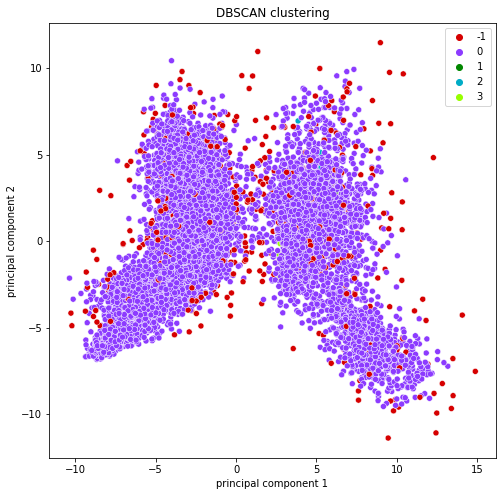

In [ ]:
dbscan(px,2.8,4)

*The above DBSCAN on the fashion Mnist data shows that we got 4 clusters but this algorithm doenot help us to find any clear differentiation among the clusters wrt the data points. Though we got 4 clusters using the above parameter values the plot seems to be divided into two clusters as a whole, based on density of points. It is clearly seen that we cannot interpret anything from the above plot and thus we can deduce that DBSCAN is not recommended here for defining the clusters for fashion Mnist dataset.*

# ***Tsne on encoded layer:***

In [ ]:
from sklearn.manifold import TSNE
#tSNE
tsne = TSNE(n_components=2)
z = tsne.fit_transform(px)

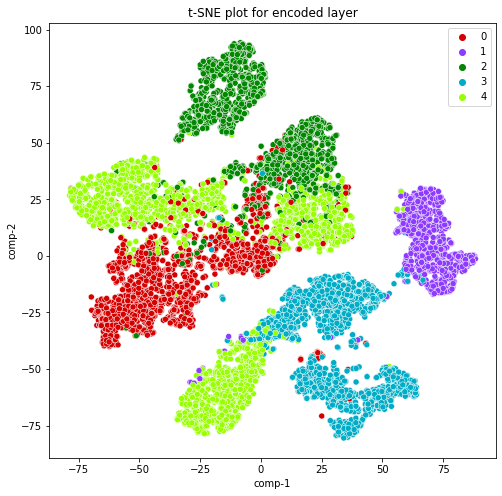

In [ ]:
df = pd.DataFrame()
df["y"] = y_test1
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
# plt.scatter(df['comp-1'],df['comp-2'],c=abalone_r['Rings'],cmap='Set1')
plt.figure(figsize=(8,8))
fig=sns.scatterplot(df['comp-1'],df['comp-2'], hue=y_test1,palette=sns.color_palette(cc.glasbey, n_colors=5),
data=df[['comp-1','comp-2']])
plt.title("t-SNE plot for encoded layer")
plt.show()

*The above tsne plot helps us better in interpreting the fashion mnist dataset. From the plot we can see that there are two clusters formed for label 3 which are at some ditance from each other showing us that there are clothes/apparels which are of different type grouped as one label. There are few cluster points of label 3 which are nearer to cluster of label 1 which shows there might be some apparels which are of same type, present in both. Label 0 (red), 4(light green), 2(dark green) are close to each other so we can interpret as clothes like a jackets or shirts or hoodies which are similar in shape or pixel values. SO comparing all the four plots above we can clearly say that tsne and kmeans plot performs much better for our fashion mnist dataset.*

*Label 2 and label 3 form two clusters so we can say that each label has a combination of two different type of clothes or boots*

*label 4 has three clusters so combination of 3 types of apparels grouped as label 4*

*Now we will plot first 50 images from our training dataset and sort them by the labels to have clear interpretation of our tsne plot and the images from out training dataset.*

### Displaying the labels of first 50 datapoints:

In [ ]:
f=y_train
y_train1=[]
y_train1=[np.where(r==1)[0][0] for r in f]
list0=[];list1=[];list2=[];list3=[];list4=[]
# plt.figure(figsize=(20,20))
for i in range(50):  
    if (y_train1[i] == 0):
      list0.append(i)
    if (y_train1[i] == 1):
      list1.append(i)
    if (y_train1[i] == 2):
      list2.append(i)
    if (y_train1[i] == 3):
      list3.append(i)
    if (y_train1[i] == 4):
      list4.append(i)

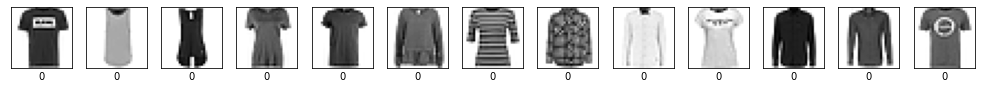

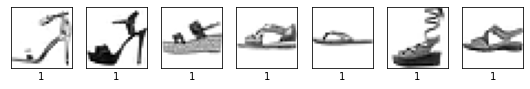

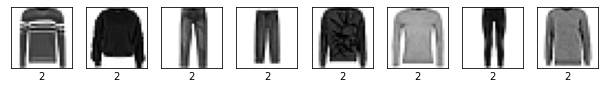

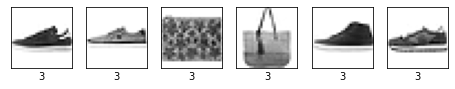

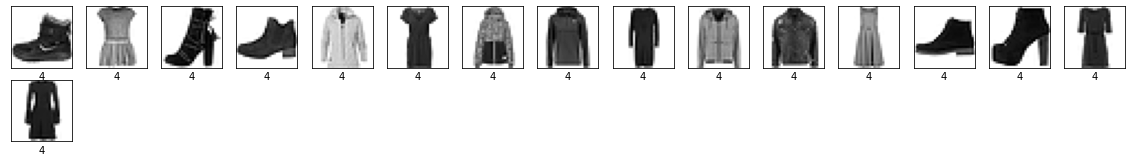

In [ ]:
def plott(list_name,label):
  plt.figure(figsize=(20,20))  
  for i in range(len(list_name)):
    plt.subplot(15,15,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[list_name[i]].reshape((28,28)), cmap=plt.cm.binary)    
    plt.xlabel(label)
  plt.show()
plott(list0,0)
plott(list1,1)
plott(list2,2)
plott(list3,3)
plott(list4,4) 

*So the above images are the first 50 images from our training dataset grouped together in terms of the labels.*

*Comparing these images with tsne plot, we can see that as we discussed about the two dark green clusters of label 2, they are pullover and trousers which are classified as label 2.*

*In tsne plot Label 3 clusters also had two clusters separated by some distance, on viewing the label 3 images we can see there are two types of apparels which are purse and sneakers.*

*Cluster with label 1 in tsne plot was compact and at a distant from other clusters, on viewing the images it clearly shows that label 1 is sandals.*

*Clusters with label 0 were spread out in the entire plot which gave a sense that it might have combination of clothes, on comparing it with the images we can see that it contains tshirt, shirt and skirts.*

*Clusters with label 4 in the tsne plot were in three separate clusters far apart from each other so we could say that it had a combination of three apparels labelled as '4'. On seeing the images we can finally say that they are ankle-boots, coat and a dress.*

# References:

[1] https://keras.io/getting_started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer-feature-extraction

[2] https://www.tensorflow.org/tutorials/images/cnn

[3] https://keras.io/api/layers/convolution_layers/

[4] https://keras.io/api/layers/reshaping_layers/flatten/

[5] https://towardsdatascience.com/image-classification-with-fashion-mnist-why-convolutional-neural-networks-outperform-traditional-df531e0533c2

[6] https://medium.com/analytics-vidhya/my-first-image-classifying-model-fashion-mnist-89c85f4aa4e1

[7] https://medium.datadriveninvestor.com/implementing-convolutional-neural-network-using-tensorflow-for-fashion-mnist-caa99e423371

[8] https://medium.com/@joel_34096/k-means-clustering-for-image-classification-a648f28bdc47

[9] https://keras.io/api/layers/core_layers/dense/



